<a href="https://colab.research.google.com/github/songmengh/mean-field/blob/main/HF_Hubbard_square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mean-field:  The Hartree-Fock (HF) Approximation
## Square Latice Hubbard model

This notebook contains breif notes and several sample codes of the HF approximation for pedagogical purpose.

The following text and codes are prepared by Mr.[Shibo Shan](https://quantummc.xyz/shibo-shan/), Mr.[Ting-Tung Wang](https://quantummc.xyz/members/ting-tung-wang/), Mr.[Menghan Song](https://quantummc.xyz/members/menghan-song/) and [ZYM](https://quantummc.xyz/members/ziyang-meng/).

This note utilise the following useful references:
1. [Lechermann, Model Hamiltonians and Basic Techniques](https://www.researchgate.net/publication/299842893_Model_Hamiltonians_and_Basic_Techniques)
2. [Xu, Chang, Walter and Zhang, J. Phys.: Condens. Matter 23 (2011) 505601](https://iopscience.iop.org/article/10.1088/0953-8984/23/50/505601)
3. [Matsuyama and Greensite, Annals of Physics 442 (2022) 168922](https://www.sciencedirect.com/science/article/pii/S0003491622001014?via%3Dihub)
4. [Hirsch, Phys. Rev. B 31, 4403 (1985)](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.31.4403)

### 1. Hubbard Model on Square Lattice

At half-filling, the Hamiltonian of the square lattice Hubbard model is,

$$
H=-t\mathop{\sum}\limits_{\langle i,j \rangle \sigma}(c_{i\sigma}^\dagger c_{j\sigma}+\text{h.c.})+U\mathop{\sum}\limits_i (n_{i\uparrow}-\frac{1}{2})(n_{i\downarrow}-\frac{1}{2})=H_T+H_U  \ \ \  (U>0),
$$
where $\langle i,j \rangle$ denotes the nearest neighbour hopping on the square lattice.

### 2. Hartree-Fock

The mean-field (MF) treatment of a many-body Hamiltonian is to approximate the ground state wavefunction with a product of single-particle wave functions. In such an approximation, individual particle is moving in the $\mathit{mean-field}$ generated by their mutual interactions. Applying this idea in to the Hubbard model, we decouple on the many-body Hamiltonian at the operator level to write the density operator as:

$$
n_{i\sigma} = ⟨n_{i\sigma}⟩ + \delta {n_{i\sigma}},
$$

which means that there is a bulk part of $\langle n_{i\sigma}\rangle$ as a mean-field, and a smaller part
$$
\delta n_{i\sigma} = n_{i\sigma}-\langle n_{i\sigma}\rangle
$$
that carries the quantum fluctuations around the mean-field. With this decomposition, we can write the $H_U$ part as:

$$
n_{i\uparrow}n_{i\downarrow}=\left \langle n_{i\uparrow} \right \rangle \left \langle  n_{i\downarrow}\right \rangle+ \left \langle n_{i\uparrow} \right \rangle\delta n_{i\downarrow}+\left \langle n_{i\downarrow} \right \rangle \delta n_{i\uparrow}+\delta n_{i\uparrow}\delta n_{i\downarrow}
$$

Now we peform the approximation and neglect the correlation of fluctuations $\delta n_{i\uparrow}\delta n_{i\downarrow} $, which is the reason why this is a mean-field theory. By eliminating $\delta n_{i\uparrow}\delta n_{i\downarrow}$ term, the Hubbard term hence reads:

$$
U\sum_{i}^{} n_{i\uparrow}n_{i\downarrow}=U\sum_{i}^{}(n_{i\uparrow} \left \langle  n_{i\downarrow}\right \rangle+n_{i\downarrow} \left \langle  n_{i\uparrow}\right \rangle-\left \langle n_{i\uparrow} \right \rangle \left \langle  n_{i\downarrow}\right \rangle).
$$

Since the square lattice Hubbard model is symmetric with respect to spins, we seperate the $\mathcal{H}_{HF}$ into spin $\uparrow$ and $\downarrow$ parts, $\mathcal{H}_{HF}=\mathcal{H}_{HF}^{\uparrow}+\mathcal{H}_{HF}^{\downarrow}$ with,

$$
\mathcal{H}_{HF}^{\sigma} = -t\sum_{\langle i,j\rangle}(c^{\dagger}_{i,\sigma}c_{j,\sigma}+\text{h.c.})+U\sum_i n_{i,\sigma}\left \langle n_{i,\bar{\sigma} }\right \rangle -\frac{1}{2}U\sum_i \left \langle n_{i,\uparrow} \right \rangle \left \langle n_{i,\downarrow} \right \rangle,
$$

where $\bar{\sigma}$ means the opposite spin.

### 3. Self-consistent algorithm

There are many ways to solve the MF Hamiltonian, here we first show the simplest self-consistent algorithm.

1. Randomly genrate two mean-fields of the particle number operator, $\left \langle n_{\uparrow} \right \rangle$ and $\left \langle n_{\downarrow} \right \rangle$.

2. Construct each $\mathcal{H}_{HF}^{\sigma}$ and thus $\mathcal{H}_{HF}$ from the $\left \langle n_{\uparrow} \right \rangle$ and $\left \langle n_{\downarrow} \right \rangle$ at hand.

3. Diagonalize the $\mathcal{H}_{HF}^{\sigma}$ and we can get the energy, $E_{\sigma}=\sum_{i=1}^{N_{\sigma}}\lambda_{\sigma i}$, where $\lambda_{\sigma 1}<\lambda_{\sigma 2}<...<\lambda_{\sigma N_{\sigma}}$ are the eigenvalues of the MF Hamiltonian matrix and $N_{\sigma}$ is the number of electrons with spin $\sigma$.

4. Denote the eigenvector of $\mathcal{H}_{HF}^{\sigma}$ as $\Phi_{\sigma 1},\Phi_{\sigma 2}...\Phi_{\sigma N_{\sigma}} $ corresponding to the eigenvalue $\lambda_{\sigma 1}<\lambda_{\sigma 2}<...<\lambda_{\sigma N_{\sigma}}$. Then a new pair of $\left \langle n_{\sigma} \right \rangle$ are obtained as,

$$
\left \langle n_{i \sigma}\right \rangle = \sum_{j=1}^{N_\sigma} \Phi_{(\sigma j),i}\Phi_{(\sigma j),i}^\dagger .
$$

5. Construct the new $\mathcal{H}_{HF}^{\sigma}$ from the new mean-field  $\langle n_{i \sigma} \rangle $ obtained in step 4 and iterate from step 2 of such process untill converges.

### 4.The Antiferromagnetic ordering of Hubbard model
#### 4.1 The generalized susceptibility
We can see from the result of Self-consistent algorithm that the ground state of Hubbard model has a certain magnetic ordering, namely the antiferromagnetic ordering. We will explain the cause of this ordering. The basic idea is that we add an external magnetic field as perturbation, and then explore whether the Hubbard model is unstable towards the antiferromagnetic ordering.

The Hubbard model is spin-rotationally invariant, for reasons of convenience, we assume to add an external field along the x axis with a wavevector $\mathbf{q}$. The field-interation Hamiltonian is:

\begin{align*}
H_{field} &= -\sum_i\mathbf{M_{i}}\cdot\mathbf{H}=-g\mu_B\sum_iS^x_iH^x \cos(\mathbf{q}\cdot \mathbf{r_i})\\
&=-g\mu_BH^x\sum_iS^x_i(\frac{1}{2}e^{i\mathbf{q}\cdot \mathbf{r_i}}+\frac{1}{2}e^{-i\mathbf{q}\cdot \mathbf{r_i}})\\
&=-\frac {g\mu_BH^x}{2}(S^x(\mathbf{q})+S^x(-\mathbf{q})),
\end{align*}

where $S^x(q)=\sum_iS^x_ie^{i\mathbf{q}\cdot \mathbf{r_i}}=\frac{1}{2}\sum_p(c^+_{p+q\uparrow}c_{k\downarrow}+c^+_{p+q\downarrow}c_{k\uparrow})$.

Now let us consider $H_U$ term. Using the relation

$$
n_{j\uparrow}n_{j\downarrow}
= c_{j\uparrow}^\dagger c_{j\uparrow}\,c_{j\downarrow}^\dagger c_{j\downarrow}
= c_{j\uparrow}^\dagger c_{j\uparrow}\bigl(1 - c_{j\downarrow}c_{j\downarrow}^\dagger\bigr)
= n_{j\uparrow} - c_{j\uparrow}^\dagger c_{j\downarrow}\,c_{j\downarrow}^\dagger c_{j\uparrow}
= n_{j\uparrow} - S_{j}^+ S_{j}^-,
$$

and

$$
n_{j\uparrow}n_{j\downarrow}=n_{j\downarrow} - S_{j}^- S_{j}^+.
$$

We can write

$$
H_U=\frac{NU}{2}-U\sum_i(S_i^x S_i^x+S_i^yS_i^y).
$$

Following what we did to the $n_{i\uparrow}n_{i\downarrow}$ term by mean-field approximation, we write $(S_i^x)^2$ term as

$$
S_i^xS_i^x=2S_i^x\langle S_i^x\rangle-\langle S_i^x\rangle^2,
$$

similarly for the $(S_i^y)^2$ term. We assume under an external field along the x axis with a wavevector $\mathbf{q}$, we have

$$
\langle S_i^x\rangle=S \cos(\mathbf{q}\cdot\mathbf{r_j}),\quad
\langle S_i^y\rangle=0,\quad
\langle S_i^z\rangle=0.
$$

Dropping the constant term, the $H_U$ term becomes

$$
%\begin{aligned}
H_U=-US\sum_i2S^x_i\cos(\mathbf{q}\cdot\mathbf{r_i})=-US(S^x(\mathbf{q})+S^x(\mathbf{-q})).
$$

Now assume that $S\ll1$, then

$$
H^\prime=H_{field}+H_U=-(\frac{g\mu_BH^x}{2}+US)(S^x(\mathbf{q})+S^x(\mathbf{-q})),
$$

can be considered a small perturbing term in comparison to $H_{band}$ whose ground state is $|FS\rangle=\prod_{k}^{\epsilon_{k}<\epsilon_{F}}c_{k\uparrow}^{\dagger}c_{k\downarrow}^{\dagger}|0\rangle$. The first-order perturbed ground state is

$$
|\Psi'\rangle = | \mathrm{FS} \rangle - \left( \frac{g \mu_\mathrm{B} H^x}{2} + U S \right)
\sum_{\mathbf{p} \sigma} \left( \frac{c_{\mathbf{p} + \mathbf{q}, \sigma}^\dagger c_{\mathbf{p}, -\sigma} | \mathrm{FS} \rangle}{\epsilon_{\mathbf{p}} - \epsilon_{\mathbf{p} + \mathbf{q}}}
+ \frac{c_{\mathbf{p} - \mathbf{q}, \sigma}^\dagger c_{\mathbf{p}, -\sigma} | \mathrm{FS} \rangle}{\epsilon_{\mathbf{p}} - \epsilon_{\mathbf{p} - \mathbf{q}}} \right),
$$

where $\epsilon_{k}$ is the energy band of tight-binding theory. The expectation value of $S^x(\mathbf{q})$ in the state $|\Psi'\rangle$ is

$$
\langle\Psi'|S^x(\mathbf{q})|\Psi'\rangle=\left(\frac{g\mu_BH^x}{2}+US\right)\sum_{\mathbf{p}}\frac{f(\epsilon_{\mathbf{p}})-f(\epsilon_{\mathbf{p}+\mathbf{q}})}{\epsilon_{\mathbf{p+q}}-\epsilon_{\mathbf{p}}},
$$

where
$
f(\epsilon)=\frac{1}{e^{\beta(\epsilon-\epsilon_F)}+1}
$
is the Fermi distribution function.

The self-consistency requirement $\langle\Psi'|S^x(\mathbf{q})|\Psi'\rangle=NS$ leads to

$$
S=\frac{g\mu_BH^x}{2}\cdot\frac{\chi^{(0)}(\mathbf{q})}{1-U\chi^{(0)}(\mathbf{q})}
$$

where $\chi^{(0)}(\mathbf{q})=-\frac{1}{N}\sum_{\mathbf{p}}\frac{f(\epsilon_{\mathbf{p}}) - f(\epsilon_{\mathbf{p+q}})}{\epsilon_{\mathbf{p}} - \epsilon_{\mathbf{p+q}}}$.

Finally we have the $\mathbf{q}$-dependent static susceptibility
$$
\chi(\mathbf{q})=\frac{2g\mu_BS}{H^x}=(g\mu_B)^2\frac{\chi^{(0)}(\mathbf{q})}{1-U\chi^{(0)}(\mathbf{q})}.
$$
It should be noted that the same result can be derived from random phase approximation (RPA).

#### 4.2 The instability criterion
From the expression of susceptibility, we can see that when

$$
U_{cr}(\mathbf{q})\chi^{(0)}(\mathbf{q}) = 1,
$$
the susceptibility diverges, which means that the system is unstable towards a certain ordering $\langle S^z_i\rangle=S\cos(\mathbf{q}\cdot\mathbf{r_i})$.

For 2D square lattice, the dispersion relation for $H_{band}$ is
$$
\epsilon(\mathbf{k})=-2t(\cos(k_1)+\cos(k_2)).
$$

The density of states $\rho(\epsilon)$ is
$$
\rho(\epsilon)=\frac{1}{N}\sum_k\delta[\epsilon-\epsilon(k)]=\frac{1}{4\pi^2}\oint_{\epsilon(\mathbf{k})=\epsilon}\frac{dl}{|\nabla_{k}\epsilon(\mathbf{k})|}.
$$

When $\epsilon \to 0$, $\rho(\epsilon) \sim \ln(\frac{t}{|\epsilon|})$.

The derivation is as follows.

The singularity of $\rho(\epsilon)$ arises mainly from the small environment of four points $(0,\pm \pi)$, $\;$ $(\pm \pi,0)$. In a small environment of $(\pi,0)$, introducing a new variable $k_1^\prime=\pi-k_1$, we have
$$
\cos(k_1^\prime) \approx 1-\frac{k_1^{\prime 2}}{2}, \quad
\cos(k_2)\approx 1-\frac{k_2^2}{2}.
$$

For the sake of convenience, we assume $\epsilon>0$. The equipotential line is
$$
-2t(\cos(k_1)+\cos(k_2))=\epsilon.
$$
Using the expansion of cosine funcion, we obtain

$$
k_2^2-k_1^{\prime 2} = \frac{\epsilon}{t}.
$$

Using the relation above, we have

$$
dl=\sqrt{1+(\frac{dk_2}{dk_1})^2}dk_1=\sqrt{1+(\frac{dk_2}{dk_1^\prime})^2}dk_1^\prime=\sqrt{\frac{\frac{\epsilon}{t}+2k_1^{\prime2}}{\frac{\epsilon}{t}+k_1^{\prime2}}},
$$
and
$$
|\nabla_k\epsilon(\mathbf{k})|=2t\sqrt{k_y^2+k_1^{\prime2}}=2t\sqrt{\frac{\epsilon}{t}+2k_1^{\prime2}}.
$$

Therefore,

\begin{aligned}
\rho(\epsilon)&=\frac{1}{4\pi^2}\oint_{\epsilon(\mathbf{k})=\epsilon}\frac{dl}{|\nabla_{k}\epsilon(\mathbf{k})|}\\
&\sim\int_0^{O(1)}\frac{dk_1^\prime}{\sqrt{\frac{\epsilon}{t}+k_1^{\prime2}}}\\
&=\ln(k_1^\prime+\sqrt{\frac{\epsilon}{t}+k_1^{\prime2}})\Big|_0^{O(1)}\\
&\sim \ln(\frac{t}{\epsilon}).
\end{aligned}


$\epsilon(\mathbf{k})$ and $\rho(\epsilon)$ are plotted below.
<!-- <img src="2d_square_lattice.png" width="400px" style="display: block; margin: 0 auto;" />
<img src="2d_square_dos.png" width="400px" style="display: block; margin: 0 auto;" /> -->

<p align="center">
  <img src="https://github.com/songmengh/mean-field/blob/main/figures/2d_square_band.png?raw=1" width="300px" alt="aaa" />
  <img src="https://github.com/songmengh/mean-field/blob/main/figures/2d_square_dos.png?raw=1" width="380px" alt="bbb" />
</p>

At half-filling, $\epsilon_F=0$.

When $\mathbf{q} = 0$, the susceptibility goes as

$$
\chi^{(0)}(\mathbf{q}=\mathbf{0}) = -\frac{1}{N}\sum_{\mathbf{p}}\frac{\frac{\partial f}{\partial \epsilon}(\frac{\partial \epsilon}{\partial \mathbf{p}}\cdot\mathbf{q})}{\frac{\partial \epsilon}{\partial \mathbf{p}}\cdot\mathbf{q}}=-\int \frac{\partial f}{\partial\epsilon}\rho(\epsilon) d\epsilon \overset{T\to 0}{\sim}-\ln\frac{T}{t}.
$$

$\chi^{(0)}(\mathbf{q}=\mathbf{0})$ diverges due to the divergence of density of states at $\epsilon=0$. This means that the lattice is unstable into a pattern $\langle S^z_i\rangle=S$ at $U\to 0$, which corresponds to a ferromagnetic order.

However, at $\mathbf{q} = (\pi,\pi)$\, $\epsilon(\mathbf{k})$ satisfies the perfect nesting conditions
$$
\epsilon(\mathbf{k}+\mathbf{q})=-\epsilon(\mathbf{k}).
$$
$\chi^{(0)}(\mathbf{q})$ also diverges (in fact even stronger):
$$
\chi^{(0)}(\mathbf{q}=(\pi,\pi))=\int \frac{f(-\epsilon)-f(\epsilon)}{2\epsilon}\rho(\epsilon)d\epsilon\overset{T\to 0}{\sim}(\ln\frac{T}{t})^2.
$$
The divergence of $\mathbf{q}=(\pi,\pi)$ is stronger than $\mathbf{q}=\mathbf{0}$.

This means that the corresponding $U_{cr}((\pi,\pi))=0^{+}$ is smaller than $U_{cr}((0,0))=0^{+}$, implying that the system tends toward antiferromagnetic order. This order is called the Néel order, after the French physicist [Louis Néel](https://en.wikipedia.org/wiki/Louis_N%C3%A9el), who actually didn't believe the quantum mechnic nature of the Néel state, we will discuss this part later in the lecture.

### 5. The gap equation
For antiferromagnetic ordering
$$
\langle n_{i\sigma}\rangle=\frac{n}{2}+\eta(\sigma)me^{i\mathbf{Q}\cdot \mathbf{r_j}}
$$
where $\eta(\uparrow)=1$, $\eta(\downarrow)=-1$ , $\mathbf{Q}=(\pi,\pi)$ .

Now that the system is in Néel state, it is convenient to divide the lattice into two sublattices, and rewrite the Hamiltonian in momentum space.
The new basis vectors are $\mathbf{a}_1=(1,1)$, $\mathbf{a}_2=(1,-1)$. The new boundary of the first Brilliouin zone is plotted below as a dashed line.
<p align="center">
  <img src="https://github.com/songmengh/mean-field/blob/main/figures/brilliouinzone.png?raw=1" width="400px" alt="aaa" />
</p>

The Fourier transform of an operator and its inverse are

$$
c_i = \frac{1}{\sqrt{N}}\sum_ic_{\mathbf{k}} e^{i\mathbf{k}\cdot \mathbf{r_i}},
$$

$$
c_{\mathbf{k}} = \frac{1}{\sqrt{N}}\sum_{\mathbf{k}}c_{i} e^{-i\mathbf{k}\cdot \mathbf{r_i}}.
$$

After Fourier transform and using the relation:

$$
\sum_ie^{i\mathbf{r_i}\cdot(\mathbf{k_2}-\mathbf{k_1})}=N\delta_{\mathbf{k_1},\mathbf{k_2}},
$$
the $H_{band}$ term can be rewritten as

$$
H_{band} = \sum_{\mathbf{k}\sigma}\epsilon(\mathbf{k})c_{\mathbf{k}\sigma}^{\dagger}c_{\mathbf{k}\sigma},
$$

where

$$
\epsilon(\mathbf{k})=-2t((\cos(k_1)+\cos(k_2))),
$$
as we have seen in Sec.4.2 above.

The summation range for k points is the first brillouin zone. For each $\mathbf{k}$ in new brillouin zone (NBZ), $\mathbf{k}+\mathbf{Q}$ is outside the NBZ. In the spirit of the reduced zone scheme, we ascribe the state created by $c_{\mathbf{k}+\mathbf{Q}}^\dagger$ also to $\mathbf{k}$, by introducing the new fermion creation operator $d_{\mathbf{k}}^\dagger = c_{\mathbf{k}+\mathbf{Q}}^\dagger$. The folded-back tight-binding structure is described by:

$$
H_{band} = \sum_{\mathbf{k}\sigma}^{NBZ}(\epsilon(\mathbf{k})\; c_{\mathbf{k}\sigma}^{\dagger}c_{\mathbf{k}\sigma}+\epsilon(\mathbf{k}+\mathbf{Q})c_{\mathbf{k}+\mathbf{Q}\sigma}^{\dagger}c_{\mathbf{k}+\mathbf{Q}\sigma})
=\sum_{\mathbf{k}\sigma}^{NBZ}(\epsilon(\mathbf{k})\; c_{\mathbf{k}\sigma}^{\dagger}c_{\mathbf{k}\sigma}+\epsilon(\mathbf{k}+\mathbf{Q})d_{\mathbf{k}\sigma}^{\dagger}d_{\mathbf{k}\sigma}).
$$

Now calculate the $H_U$ term.
$$
H_U = U\sum_{i}^{} n_{i\uparrow}n_{i\downarrow}=U\sum_{i}^{}(n_{i\uparrow} \left \langle  n_{i\downarrow}\right \rangle+n_{i\downarrow} \left \langle  n_{i\uparrow}\right \rangle-\left \langle n_{i\uparrow} \right \rangle \left \langle  n_{i\downarrow}\right \rangle).
$$

The first two terms are

\begin{align*}
U\sum_{i\sigma}n_{i\sigma} \langle n_{i\bar{\sigma}}\rangle&=U\sum_{i\sigma}\frac{1}{N}\sum_{\mathbf{k_1k_2}}e^{\mathbf{r_i}\cdot(\mathbf{k_1-k_2})}c_{\mathbf{k_1}\sigma}^\dagger c_{\mathbf{k_2\sigma}}\left(\frac{n}{2}-m\eta(\sigma)e^{i\mathbf{Q}\cdot\mathbf{r_i}}\right)\\
&=\frac{Un}{2}\sum_{\mathbf{k}\sigma}c_{\mathbf{k}\sigma}^\dagger c_{\mathbf{k}\sigma}-Um \sum_{\mathbf{k_1} \mathbf{k_2} \sigma}\eta{\sigma} c_{\mathbf{k_1}\sigma}^\dagger c_{\mathbf{k_2} \sigma} \delta_{\mathbf{k_1},\mathbf{k_2}+\mathbf{Q}}\\
&= \frac{Un}{2}\sum_{\mathbf{k}\sigma}^{NBZ}( c_{\mathbf{k}\sigma}^\dagger c_{\mathbf{k}\sigma}+d_{\mathbf{k}\sigma}^\dagger d_{\mathbf{k}\sigma})-Um\sum_{\mathbf{k}\sigma}^{NBZ}\eta(\sigma).
\end{align*}

We drop the $\left \langle n_{i\uparrow} \right \rangle \left \langle  n_{i\downarrow}\right \rangle$, and add $H_{band}$ and $H_U$ together, $H$ becomes block diagonal,

$$
H = \sum_{\mathbf{k}\sigma}^{NBZ}
\begin{pmatrix}
c_{\mathbf{k}\sigma}^\dagger&d_{\mathbf{k}\sigma}^\dagger
\end{pmatrix}\begin{pmatrix}
\epsilon(\mathbf{k})+\frac{Un}{2}&-Um\eta(\sigma)\\-Um\eta(\sigma)&\epsilon(\mathbf{k}+\mathbf{Q})+\frac{Un}{2}
\end{pmatrix}
\begin{pmatrix}
c_{\mathbf{k}\sigma}\\d_{\mathbf{k}\sigma}
\end{pmatrix}.
$$

Solving the eigenvalues, we obtain two energy bands
$$
\lambda^{\pm}(\mathbf{k})=\frac{Un}{2}\pm\sqrt{\epsilon(\mathbf{k})^2+U^2m^2}.
$$
We can see that the energy gap between two bands is $2Um=2\Delta$ from the above expression.

Adding the term we previously dropped and using the half-filling condition $\langle n \rangle=1$, we get the ground state energy per electron

$$
E = Um^2-\frac{2}{N}\sum_\mathbf{k}^{NBZ}\sqrt{\epsilon(\mathbf{k})^2+U^2m^2}.
$$

We can regard $m$ as a variational parameter, and determine it by requiring that E(m) be minimum

$$
\frac{\partial E(m)}{\partial m}=0,
$$

which yields the gap equation
$$
1=\frac{1}{N}\sum_{\mathbf{k}}^{NBZ}\frac{U}{\sqrt{\epsilon(\mathbf{k})^2+\Delta^2}},
$$
where $\Delta=Um$, and the energy gap is 2 $\Delta$ , as we discussed.

Using the symmmetry of $\rho(\epsilon)$ about the center of the band, rewriting the gap equation as

$$
1=U\int_0^{4t}\frac{\rho(\epsilon)d\epsilon}{\sqrt{{\epsilon^2}+\Delta^2}},
$$

solve the eqution approximately, We have the result for $d=1,3$
$$
\Delta{\sim}te^{-2\pi\frac{t}{U}}\quad(d=1,3),
$$
and due to the singularity in the density of states for $d=2$
$$
\Delta{\sim}te^{-2\pi\sqrt{\frac{t}{U}}}\quad(d=2).
$$

The last equation is given in [Jorge E. Hirsch](https://en.wikipedia.org/wiki/Jorge_E._Hirsch)'s famous 1985 paper [Hirsch, Phys. Rev. B 31, 4403 (1985)](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.31.4403).


### 6. Gradient-descent algorithm

We developed a machine-learning style gradient-descent algorithm to obtain the covergence of the MF Hamiltonian in momentum space. It turns out in many cases, such as the square, honeycomb and triangular lattice Hubbard models, this Gradient-descent algorithm is much faster than the traditional Self-consistent algorithm and can access much larger system sizes.

As we discussed above, the ground energy and the $Gradient$ of the energy with respect to m is

$$
E = Um^2-\frac{2}{N}\sum_\mathbf{k}^{NBZ}\sqrt{\epsilon(\mathbf{k})^2+U^2m^2}
$$

$$
\frac{\partial E}{\partial m} =  2Um-\frac{2}{N}\sum_\mathbf{k}^{NBZ}\frac{U^2m}{\sqrt{\epsilon(\mathbf{k})^2+U^2m^2}}
$$

Order parameter m can be determined by requiring $\frac{\partial E(m)}{\partial m}=0$. Solving for the order parameter $m$ thus becomes a one-dimensional optimization problem. This approch allows us to go to much larger system sizes, as the computation cost now increases only linearly with the system size $O(N)$ with $N=L\times L$, whereas in the Self-consistent algorithm in Sec.3, the full diagonalization of the mean-field Hamiltonian matrix scales as $O(N^3)$.

As can be easily tested below, with the real-space self-consistent algorithm one can only achieve $20\times 20$ lattice, but with the gradient-descent algorithm, one can obtian the results for $1000\times 1000$ lattice.


### 7. Code
#### 7.1 Real-space self-consistent

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [18]:
def cart_coord(i,Lx): # i is the site index starts from 1.
    ix = i % Lx
    iy = i//Lx + 1
    if i % Lx == 0:
        iy -= 1
        ix = Lx
    return ix,iy

def linear_index(ix,iy,Lx):  #output linear index starts from 1.
    return int((iy-1)*Lx+ix)


def Neighbor(index,Lx,Ly):
    ix,iy=cart_coord(index,Lx)
    up_y = iy - 1   # Here we denote ⬇ as the 'up' direction for y coordinate.
    if up_y <1:
        up_y=Ly
    up = linear_index(ix,up_y,Lx)

    down_y = iy+1
    if down_y > Ly:
        down_y = 1
    down=linear_index(ix,down_y,Lx)

    left_x=ix-1
    if left_x < 1:
        left_x = Lx
    left = linear_index(left_x,iy,Lx)

    right_x = ix+1
    if right_x > Lx:
        right_x = 1
    right = linear_index(right_x,iy,Lx)
    return up,down,left,right

def GetK(Lx,Ly,t):
    MatDim = Lx*Ly
    N_pc = Lx*Ly
    K_mat = np.zeros((MatDim,MatDim))
    for i in range(N_pc):
        down = Neighbor(i+1,Lx,Ly)[1]-1
        right = Neighbor(i+1,Lx,Ly)[3]-1
        K_mat[i][down]-=t
        K_mat[down][i]-=t
        K_mat[i][right]-=t
        K_mat[right][i]-=t
    return K_mat


In [19]:
def GetHup(Lx,Ly,nup,ndn,K,U):
    N = Lx*Ly
    Diag = np.diag(ndn)*U
    Hup = np.zeros((N,N))
    Hup += K
    Hup += Diag
    Hup -= U*np.diag(np.ones(N)*np.sum(nup*ndn))

    return Hup

In [20]:
def GetHdn(Lx,Ly,nup,ndn,K,U):
    N = Lx*Ly
    Diag = np.diag(nup)*U
    Hdn = np.zeros((N,N))
    Hdn += K
    Hdn += Diag
    #print('Hdn')
    #Hdn -= U*np.diag(np.ones(N)*np.sum(nup*ndn))
    #print(U*np.diag(np.ones(N)*sum(nup*ndn)))
    #print(Hdn)
    #Hdn -= 1/2*U*sum(nup*ndn)
   # Hdn -= 1/2*U*np.diag(nup*ndn)
    return Hdn

In [21]:
def GetEigen(H):
    eig_value=np.real(np.linalg.eig(H)[0])
    #eig_vec=np.real(np.linalg.eig(H)[1])
    eig_vec=np.linalg.eig(H)[1]
    idx_sorted1 = np.argsort(eig_value)
    eig_value=eig_value[idx_sorted1]
    eig_vec=eig_vec[:,idx_sorted1]
    eig_vec = np.sign(eig_vec)*eig_vec
    return eig_value,eig_vec

In [22]:
def Getnup(upvecs,N):
    '''At half-filling, we have N/2 number of spin up/down electrons'''
    nup = np.zeros((N))
    for i in range(N):
        value = 0
        for j in range(N//2):
            value += abs(upvecs[i][j])**2
        nup[i] = value
    return nup

In [23]:
def Getndn(dnvecs,N):
    ndn = np.zeros((N))
    for i in range(N):
        value = 0
        for j in range(N//2):
            value += dnvecs[i][j]**2
        ndn[i] = value
    return ndn


In [24]:
def Iteration(Lx,Ly,U):

    N = Lx*Ly
    t = 1
    K = GetK(Lx,Ly,t)
    delt = 0.001
    alpha = 0.6
    times=0

    #initial n
    nup = np.random.random((N))
    #print(nup)
    ndn = np.random.random((N))
    #nup = np.ones((N))/2+np.random.random((N))*0.2
    #ndn = np.ones((N))/2+np.random.random((N))*0.2


    E1=E2=0
    i=1
    while True:
       # print(sum(nup*ndn))
        #print('a')
        #print(GetHup(Lx,Ly,nup,ndn,K,U))
        Hup = GetHup(Lx,Ly,nup,ndn,K,U)#-U*np.diag(np.ones(N)*np.sum(nup*ndn))
        #print(Hup)
        #Hup_ = GetHup(Lx,Ly,nup,ndn,K,U)#-U*p.diag(np.ones(N)*np.sum(nup*ndn))
        #print(Hup_)
        #print(U*np.diag(np.ones(N)*np.sum(nup*ndn)))
       # print(Hup)
        Hdn = GetHdn(Lx,Ly,nup,ndn,K,U)#-U*np.diag(np.ones(N)*np.sum(nup*ndn))
        #Hdn_ = GetHdn(Lx,Ly,nup,ndn,K,U)#-U*np.diag(np.ones(N)*np.sum(nup*ndn))
        eig_eup,eig_vup = GetEigen(Hup)
        eig_edn,eig_vdn = GetEigen(Hdn)

        #eig_eup_,eig_vup_ = GetEigen(Hup_)
        #eig_edn_,eig_vdn_ = GetEigen(Hdn_)

        #print('vupdiff:',np.max(eig_vup_-eig_vup))
        #print('vdndiff:',np.max(eig_vdn_-eig_vdn))

        Eup = sum(eig_eup[:(N//2)])
        Edn = sum(eig_edn[:(N//2)])
        E = Eup+Edn

        E1 = E2
        E2 = E

        nup0 = nup
        ndn0 = ndn

        nup1 = Getnup(eig_vup,N)
        ndn1 = Getndn(eig_vdn,N)

        #nup1_ = Getnup(eig_vup_,N)
        #ndn1_ = Getndn(eig_vdn_,N)

        #print('nup diff:',np.max(nup1_-nup1))
        #print('ndn diff:',np.max(ndn1_-ndn1))

        nup_new = (1-alpha)*nup0+alpha*nup1
        ndn_new = (1-alpha)*ndn0+alpha*ndn1
        #nup_new = nup1
        #ndn_new = ndn1

        diffE = abs(E2-E1)
        diffup = abs(sum((nup_new-nup0)))
        diffdn = abs(sum((ndn_new-ndn0)))



        nup = nup_new
        ndn = ndn_new


        i+=1
        if diffup < delt**2 and diffdn < delt**2 and diffE<0.0001:
            # print('converge at:',times)
            # print('D_E:',diffE)
            # print('D_n:',diffup,diffdn)
            # print('E:',E)
            break

        times+=1
        #if times%10==0:
            #print(times)
    #print(i)
    return nup,ndn,E

Here $\mathsf{nitr}$ is the number of times I call the $\mathsf{Iteration}$ function. I run the $\mathsf{Iteration}$ many times since it does not necessarily converge to the global minimun, i.e. ground state(it may get stuck at the local minimum). Thus, I run more times to find one trial which gives the smallest ground state energy and consider it as the global minimum.

In [25]:
def Run(Lx,Ly,U):
    N = Lx*Ly
    nitr = 20
    nups = np.zeros((nitr,N))
    ndns = np.zeros((nitr,N))
    Es = np.zeros((nitr))
    for i in range(nitr):

        nup,ndn,E = Iteration(Lx,Ly,U)
        nups[i]=nup
        ndns[i]=ndn
        Es[i]=E
        #print(E)
    idx = np.argmin(Es)
    nup_gs = nups[idx]
    ndn_gs = ndns[idx]
    E_gs = Es[idx]

    return nup_gs,ndn_gs,E_gs

In [26]:
nup_gs,ndn_gs,E_gs = Run(6,6,4)
nup_gs,ndn_gs,E_gs

(array([0.8287725 , 0.72855698, 0.16616352, 0.15523674, 0.80304221,
        0.19194426, 0.24497019, 0.13045545, 0.74868112, 0.18083635,
        0.27233003, 0.82638132, 0.79915354, 0.7263852 , 0.18121806,
        0.17204739, 0.74854919, 0.78733496, 0.82726545, 0.25775083,
        0.18024361, 0.81240271, 0.13963777, 0.24973345, 0.19395982,
        0.86659783, 0.83184429, 0.15326845, 0.81959797, 0.85130529,
        0.84069081, 0.24345869, 0.16831594, 0.8105841 , 0.2122427 ,
        0.84904128]),
 array([0.1712275 , 0.27144302, 0.83383648, 0.84476326, 0.19695779,
        0.80805574, 0.75502981, 0.86954455, 0.25131888, 0.81916365,
        0.72766997, 0.17361868, 0.20084646, 0.2736148 , 0.81878194,
        0.82795261, 0.25145081, 0.21266504, 0.17273455, 0.74224917,
        0.81975639, 0.18759729, 0.86036223, 0.75026655, 0.80604018,
        0.13340217, 0.16815571, 0.84673155, 0.18040203, 0.14869471,
        0.15930919, 0.75654131, 0.83168406, 0.1894159 , 0.7877573 ,
        0.15095872]),
 np.

From [Ref.[4]](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.31.4403) above, we know that for the half-filled square lattice Hubbard model, the appropriate solution is an antiferromagnetic ordered phase with N\'eel order,

\begin{align}
  \left \langle n_{i\uparrow} \right \rangle = n+(-1)^{i}m \\
 \left \langle n_{i\downarrow} \right \rangle = n-(-1)^{i}m .
\end{align}

The color maps below illustrate the charge density $\left \langle n_{i\uparrow} \right \rangle+\left \langle n_{i\downarrow} \right \rangle$ and spin density $\left \langle n_{i\uparrow} \right \rangle-\left \langle n_{i\downarrow} \right \rangle$ for a $L_x=L_y=6$ square lattice.

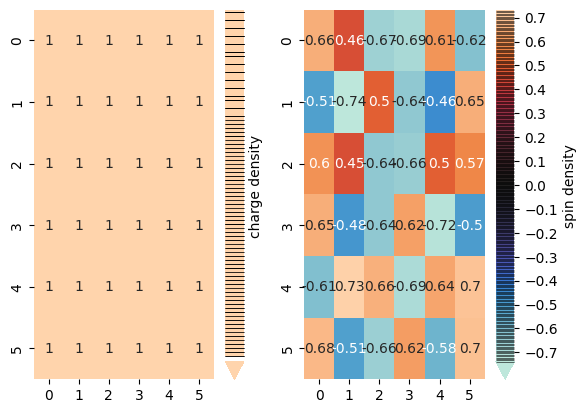

In [27]:
data1 = (nup_gs + ndn_gs).reshape(6, 6)
data1 = pd.DataFrame(data1)
tick1_ = np.arange(0, 1, 0.1).astype(float)
dict1_ = {'orientation': 'vertical', "label": "charge density", "drawedges": True,
          "ticklocation": "left", "extend": "min", "alpha": 0.8, "cmap": "cmap", "ticks": tick1_}

data2 = (nup_gs - ndn_gs).reshape(6, 6)
data2 = pd.DataFrame(data2)
tick2_ = np.arange(-1, 1, 0.1).astype(float)
dict2_ = {'orientation': 'vertical', "label": "spin density", "drawedges": True,
          "ticklocation": "top", "extend": "min", "alpha": 0.8, "cmap": "cmap", "ticks": tick2_}

fig, ax = plt.subplots(1, 2)

sns.heatmap(data1, cbar_kws=dict1_, center=0, annot=True, ax=ax[0])
sns.heatmap(data2, cbar_kws=dict2_, center=0, annot=True, ax=ax[1])

plt.show()

Further, we write the gap equation $\Delta = Um$, which has a solution with $m \ne 0$ for any small $U$ due to the nesting of the Fermi surface. And due to the singularity in the density of states, we find for the gap, $\Delta = Um \sim te^{-2\pi \sqrt{t/U}} \ (d=2)$

In [15]:
U_lst = np.arange(0.01,5,0.5)
m_lst = []
for i in range(len(U_lst)):
    if i%2==0:
        print(i)
    U = U_lst[i]
    nup,ndn,E = Run(6,6,U)
    m = abs(nup[0]-ndn[0])/2
    m_lst.append(m)

0
2
4
6
8


Text(0, 0.5, '$m$')

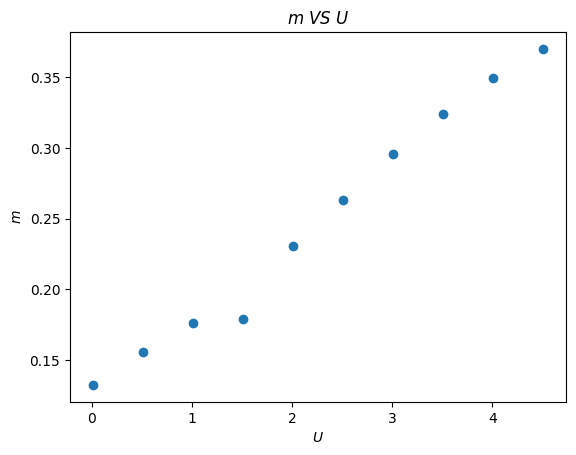

In [16]:
plt.scatter(U_lst,m_lst)
plt.title(r'$m\ VS\ U$')
plt.xlabel(r'$U$')
plt.ylabel(r'$m$')

#### 7.2 Momentum-space Gradient-descent algorithm

In [302]:
def getdedm(U,Ne,e0,m):
    '''
    return the derivative dE/dm for gradient descend
    '''
    dedm = -2*(U**2)*m*(1/np.sqrt((m**2)*(U**2)+e0)).sum()/Ne + 2*U*m
    return dedm

In [303]:
def gete(U,Ne,e0,m):
    '''
    get energy
    '''
    e = -2*(np.sqrt((m**2)*(U**2)+e0)).sum()/Ne+U/2+U*m**2

    return e

In [304]:
Ulist = np.arange(0.05,10,0.1)
Llist = np.arange(100,1000,200)
alpha = 0.1 #learning rate

e_end = np.inf*np.ones((len(Llist),len(Ulist)))
m_end = np.zeros((len(Llist),len(Ulist)))
itr_end = np.zeros((len(Llist),len(Ulist)))

for i in range(0,len(Llist)):
    L = Llist[i]
    print('L:',L)
    Ne = 2*L**2  # L^2: number of cells, and each cell contains 2 electron for half-fill
    e0y = np.tile(np.cos(np.linspace(0,L-1,L)*2*np.pi/L),(L,1))
    e0x = e0y.T
    e0=4*(e0x+e0y)**2
    m = 4/L
    for j in range(0,len(Ulist)):
        U = Ulist[j]
        error = 1
        itr = 0
        while abs(error)>10**-8:
            error = alpha*getdedm(U,Ne,e0,m)
            m -= error
            itr += 1
            #print(error)
        e_end[i,j] = gete(U,Ne,e0,m)
        m_end[i,j] = abs(m)
        itr_end[i,j] = itr

L: 100
L: 300
L: 500
L: 700
L: 900


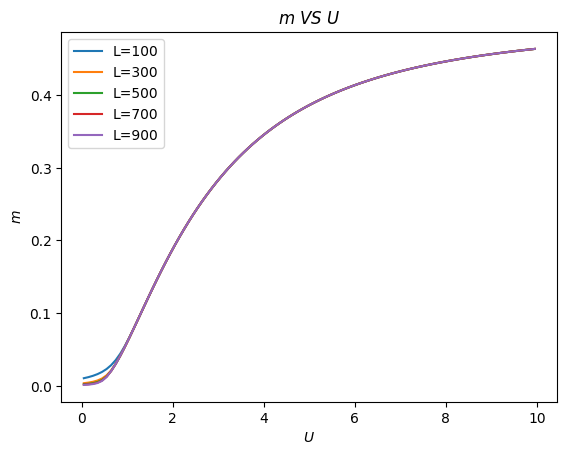

Text(0, 0.5, '$m$')

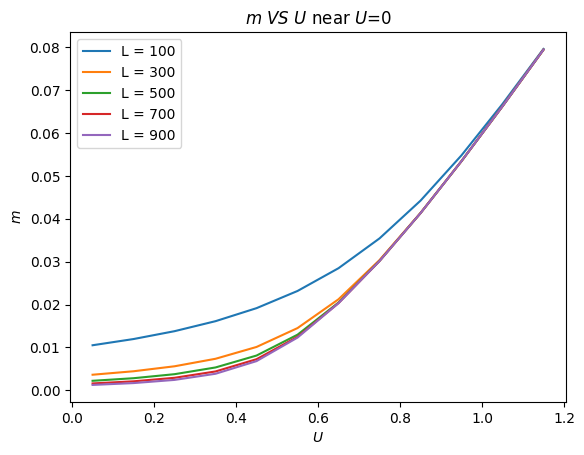

In [305]:
#plt.plot(Ulist,m_fit)
plt.plot(Ulist,m_end[0])
plt.plot(Ulist,m_end[1])
plt.plot(Ulist,m_end[2])
plt.plot(Ulist,m_end[3])
plt.plot(Ulist,m_end[4])
#plt.xlim(0.1,1)
le_here =[f'L={L}' for L in Llist]

plt.legend(le_here)
plt.title(r'$m\ VS\ U$')
plt.xlabel(r'$U$')
plt.ylabel(r'$m$')
plt.show()

Ulist_ = Ulist[Ulist<1.2]
for i in range(len(Llist)):
    m_ = m_end[i,Ulist<1.2]
    plt.plot(Ulist_,m_, label=f'L = {Llist[i]}')
    plt.title(r'$m\ VS\ U$ near $U$=0')
plt.legend()

plt.xlabel(r'$U$')
plt.ylabel(r'$m$')

The curve of $m$ versus $U$ converges to the same curve as the system size L increased. As is discussed above, $\Delta = Um \sim te^{-2\pi \sqrt{t/U}}$. We assume $Um = a e^{-2\pi \sqrt{1/U}}$. Doing a small tranformation, we have

$$
\ln(Um) = \ln(a)-2\pi\sqrt{\frac{1}{U}}
$$

We can use $y=\ln(Um)$ and $x=\sqrt{\frac{1}{U}}$ as two new variables for a linear fitting.

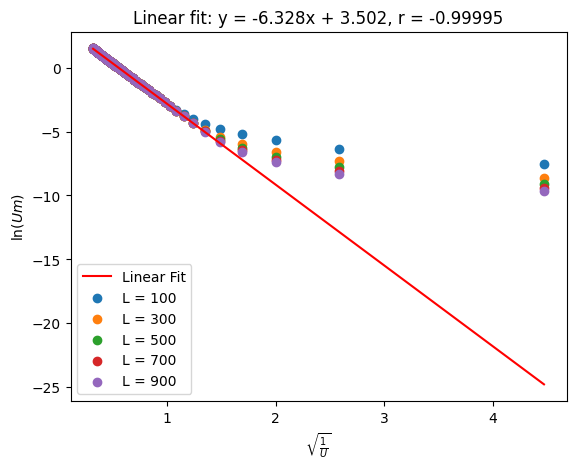

In [306]:
from scipy.stats import linregress
from scipy.stats import pearsonr

y = np.log(Ulist*m_end[4])
x = np.sqrt(1/Ulist)

x_c = x[Ulist>0.55]
y_c = y[Ulist>0.55]


slope, intercept, r_value, p_value, std_err = linregress(x_c, y_c)
correlation_coefficient, p_value = pearsonr(x_c, y_c)


#plt.scatter(x, y, label=r'$\ln(Um)$ vs $\sqrt{\frac{1}{U}}$')
plt.plot(x, slope * x + intercept,color = 'red', label='Linear Fit')

for i in range(len(Llist)):
  y = np.log(Ulist*m_end[i])
  plt.scatter(x,y,label=f'L = {Llist[i]}')

plt.xlabel(r'$\sqrt{\frac{1}{U}}$')
plt.ylabel(r'$\ln(Um)$')
plt.title(f"Linear fit: y = {slope:.3f}x + {intercept:.3f}, r = {correlation_coefficient:.5f}")
plt.legend()
plt.show()

We performed the linear fitting using the data of $m$ and $U$ for $U>0.55, L=900$. As seen from the fitting result, the expression $\Delta = Um \sim te^{-2\pi \sqrt{t/U}}$ is not valid when $U$ is small. The slope from the fitting is -6.328, which is close to $-2\pi\approx$ -6.283.

An example of how the energy $e$ and mean field $m$ evolve is shown below. Here the energy serves as the loss function, which we try to minimize using the gradient descent method.

In [307]:
L = 1000
Ne = 2*L**2  # L^2: number of cells, and each cell contains 2 electron for half-fill
e0y = np.tile(np.cos(np.linspace(0,L-1,L)*2*np.pi/L),(L,1))
e0x = e0y.T
e0=4*(e0x+e0y)**2
m = 4/L
U = 2
error = 1
alpha = 0.1
itr = 0
m_list=[]
e_list=[]
while abs(error)>10**-8:
    error = alpha*getdedm(U,Ne,e0,m)
    m -= error
    itr += 1
    e_list.append(gete(U,Ne,e0,m))
    m_list.append(m)
    #print(error)

Text(0, 0.5, 'e')

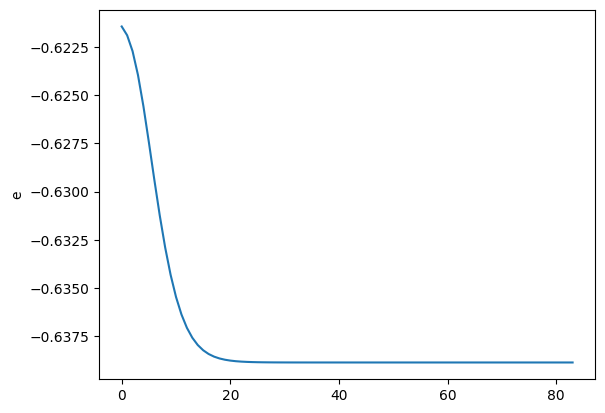

In [308]:
plt.plot(e_list)
plt.ylabel('e')

Text(0, 0.5, 'm')

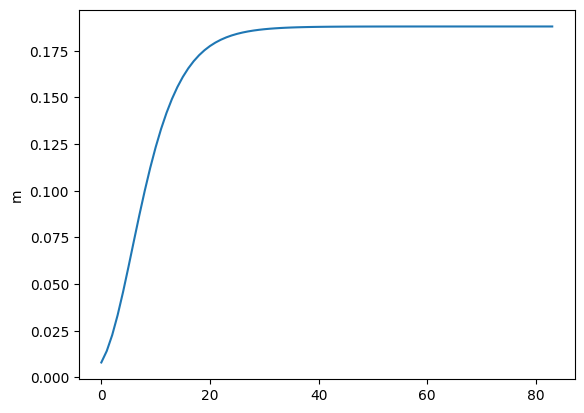

In [309]:
plt.plot(m_list)
plt.ylabel('m')

In [29]:
print(np.ones((5))*4.5333)

[4.5333 4.5333 4.5333 4.5333 4.5333]


In [287]:
Ht1 = np.array([
    [ 2.61293165, -1., -1., -1.,  0.,  0., -1.,  0.,  0.],
    [-1.,  0.59325502, -1.,  0., -1.,  0.,  0., -1.,  0.],
    [-1., -1.,  2.61246445,  0.,  0., -1.,  0.,  0., -1.],
    [-1.,  0.,  0.,  2.6362912, -1., -1., -1.,  0.,  0.],
    [ 0., -1.,  0., -1.,  0.58199157, -1.,  0., -1.,  0.],
    [ 0.,  0., -1., -1., -1.,  2.63584155,  0.,  0., -1.],
    [-1.,  0.,  0., -1.,  0.,  0.,  0.58733531, -1., -1.],
    [ 0., -1.,  0.,  0., -1.,  0., -1.,  3.15233324, -1.],
    [ 0.,  0., -1.,  0.,  0., -1., -1., -1.,  0.587556]
])

eH1,vH1 = GetEigen(Ht1)
print(eH1)

Ht2 = Ht1 -4.45679075*np.diag(np.ones(9))
eH2,vH2 = GetEigen(Ht2)

vH2 = np.sign(vH2) * vH2
vH1 = np.sign(vH1) * vH1
print(np.max(np.abs(vH2 - vH1)))

# print(vH2-vH1)
# print(np.max(vH2-vH1))

[-2.43553783 -0.41247735  0.59964597  0.59973735  1.53121791  3.61207994
  3.61225815  4.26859184  4.62448401]
7.748550065467263e-12


In [33]:
H = np.array([[1,2],[2,3]])

In [34]:
H+5

array([[6, 7],
       [7, 8]])